In [1]:
import statsmodels.api as sm
import numpy as np

In [2]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston() 
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([X, y], axis=1)

# Linear regression

## 모델적합

### sm api 이용

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
# 아래와 같이 X,y 가 되는 dataframe 을 각각 정의하여서 만들 수 있다.
dfy = df.iloc[:,-1:]
dfX = df.iloc[:,:-1]

In [5]:
model = sm.OLS(dfy, dfX) # 그 후, y 와 X 의 데이터를 적합시키면 된다.
result= model.fit() # fitting 을 통해서 ols 방법을 적용

# 그 이후 summary() 라는 객체를 이용하여서 아래처럼 R 과 비슷하게 그 결과를 뽑아낼 수 있다.

### smf api 이용 (R)

- smf 모듈을 이용하게 된다면, R 의 기준을 따르게 되므로 아래와 같이 Intercept 를 자동으로 포함하게 된다. 

In [6]:
import statsmodels.formula.api as smf

In [7]:
res = smf.ols(formula='MEDV ~ AGE + RAD + CHAS', data=df).fit() #적합하고 싶은 변수들의 이름을 넣어준다.
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     51.76
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           3.68e-29
Time:                        00:22:14   Log-Likelihood:                -1772.1
No. Observations:                 506   AIC:                             3552.
Df Residuals:                     502   BIC:                             3569.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8338      0.945     32.634      0.0

### 상수항

- statsmodels.formula.api 를 사용하지 않고 statsmodels.api 를 사용하게된다면 상수항을 원래 포함하지 않게된다. 
- constant 를 자동으로 추가해주지 않기 떄문에, assign 을 통해서 intercept = 1 이 되게 추가해 주어야 한다.
- df 에 모두 1 인 columns 는 intercept 와 같이 작용을 하기 때문에 상수항이 추가된거와 같은 효과

In [8]:
model = sm.OLS(dfy, dfX.assign(intercept=1)) # 그 후, y 와 X 의 데이터를 적합시키면 된다.
result= model.fit() # fitting 을 통해서 ols 방법을 적용
print(result.summary()) # 그 이후 summary() 라는 객체를 이용하여서 아래처럼 R 과 비슷하게 그 결과를 뽑아낼 수 있다.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 11 Apr 2021   Prob (F-statistic):          6.72e-135
Time:                        00:22:14   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1080      0.033     -3.287      0.0

In [9]:
# 기본적으로 smf 를 쓰게 된다면, -1 을 뒤에 넣게 된다면 intercept 를 없앤다.
res = smf.ols(formula='MEDV ~ AGE + RAD + CHAS-1', data=df).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.660
Model:                            OLS   Adj. R-squared (uncentered):              0.658
Method:                 Least Squares   F-statistic:                              325.6
Date:                Sun, 11 Apr 2021   Prob (F-statistic):                   1.96e-117
Time:                        00:22:15   Log-Likelihood:                         -2060.0
No. Observations:                 506   AIC:                                      4126.
Df Residuals:                     503   BIC:                                      4139.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### interaction

- 상호작용을 넣기 위해서는 변수1:변수2 처럼 : 를 이용하면 된다. 그러면 변수에 변수1\*변수2 가 들어간다.

In [10]:
model = smf.ols(formula='MEDV ~ AGE + RAD + AGE:RAD',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     41.49
Date:                Sun, 11 Apr 2021   Prob (F-statistic):           5.78e-24
Time:                        00:22:16   Log-Likelihood:                -1784.2
No. Observations:                 506   AIC:                             3576.
Df Residuals:                     502   BIC:                             3593.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9484      1.565     19.133      0.0

## 잔차도

<AxesSubplot:>

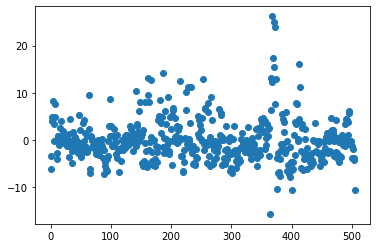

In [11]:
result.resid.plot(style="o")

## 값끼리 시각화

In [12]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [13]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='CHAS', ylabel='MEDV'>

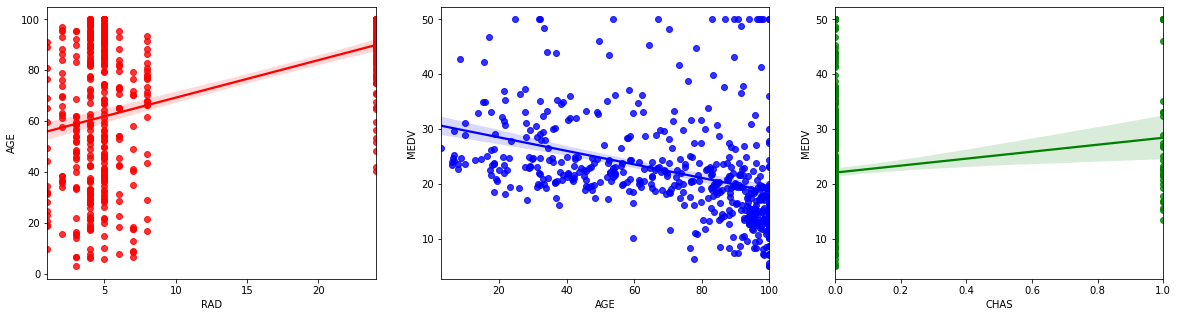

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)  
sns.regplot('RAD', 'AGE', df, color='red')
plt.subplot(1,3,2)  
sns.regplot('AGE', 'MEDV', df, color='blue')
plt.subplot(1,3,3) 
sns.regplot('CHAS', 'MEDV', df, color='green')

## 예측

In [15]:
# 주의점! intercept 를 넣어서 만든 모델이라면, predict 하는 값에서도 intercept 1 을 넣어주어야 한다.
y_new = result.predict(dfX.assign(intercept=1))

# Logistic regression

In [16]:
directmail = pd.read_csv('./data/directmail.csv')

- 먼저 각 변수에 대해서 설명하는게 우선이다. 
- Respond(Y) : 광고메일에 응답 여부로서 1 이면 구매 , 0 이면 비구매이다.
- Age : 나이
- Buy 18 : 최근 18개월 간의 구입 횟수
- FICO : 신용점수
- INCOME : 수입 
- MARRIED : 1 결혼 0 비혼
- GENDER : F : 여자  M : 남자 

In [17]:
directmail.head()

,RESPOND,AGE,BUY18,CLIMATE,FICO,INCOME,MARRIED,OWNHOME,GENDER
0,0,71.0,1,10,719.0,67.0,1.0,0.0,M
1,0,53.0,0,10,751.0,72.0,1.0,0.0,M
2,0,53.0,1,10,725.0,70.0,1.0,0.0,F
3,0,45.0,1,10,684.0,56.0,0.0,0.0,F
4,0,32.0,0,10,651.0,66.0,0.0,0.0,F


**우선 시작하기 전에 대충 전처리를 하자.**

In [18]:
# NA imputation
directmail = directmail.dropna().reset_index(drop=True)
# 정수형으로 나오도록 처리
directmail['MARRIED'] = directmail['MARRIED'].astype('int')
directmail['OWNHOME'] = directmail['OWNHOME'].astype('int')
# 원핫벡터 처리
directmail = pd.get_dummies(directmail, columns=['GENDER'], drop_first=True)

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

- glm 명령어를 통해서 Logistic 선형회귀를 할 수 있다.
- 이 때에 family = sm.families.Binomial() 을 사용하였다. 즉 Binomial family 를 이용한 glm 을 사용하라는것(즉 Logistic)
- 위처럼 family 를 binomial 을 사용한다는것은 , 최적화를 하기 위한 mle 를 Binomial 로 사용하게 된다. 즉 로지스틱임

## 모델 변수 구성

- 이게 R 에서는 ~. 를 쓰면 모든변수를 포함하는 식이였는데, 여기에서는 그런 식이 없어서, 우리가 모두 구성해야 한다.
- 아래와 같이 + 와 join 을 통해서 그러한 점을 이용하자.

In [ ]:
all_columns = "+".join(df_dum.columns.difference(["price_ratio"]))
my_formula = "price_ratio~" + all_columns
my_formula = my_formula + '+property_type_House:amenities'
my_formula = my_formula + '+amenities:city_LA'
my_formula = my_formula + '+distance:city_LA'

model = smf.ols(formula = my_formula, data=train)
result = model.fit()
result.summary()

In [20]:
model = smf.glm(formula='RESPOND ~ AGE+BUY18+CLIMATE+FICO+INCOME+OWNHOME+MARRIED+GENDER_M',
                data=directmail, 
                family=sm.families.Binomial())
results = model.fit()

- intercept 는 딱히 필요 없다.
- 나머지 8개에 대한 변수 해석이 중요함.

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                RESPOND   No. Observations:                 9727
Model:                            GLM   Df Residuals:                     9718
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2488.8
Date:                Sat, 03 Apr 2021   Deviance:                       4977.5
Time:                        14:41:13   Pearson chi2:                 9.76e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7134      0.948      2.862      0.004       0.855       4.572
AGE           -0.0380      0.004     -8.491      0.000      -0.047      -0.029
BUY18          0.4614      0.058      7.894      0.000       0.347       0.576
CLIMATE       -0.0206      0.006     -3.289      0.001      -0.033      -0.008
FICO          -0.0050      0.001     -3.760      0.000      -0.008      -0.002
INCOME        -0.0014      0.002     -0.570      0.569      -0.006       0.003
OWNHOME       -0.4215      0.090     -4.662      0.000      -0.599      -0.244
MARRIED        0.5346      0.090      5.935      0.000       0.358       0.711
GENDER_M      -0.0766      0.080     -0.961      0.337      -0.233       0.080
==============================================================================
"""

In [19]:
model = smf.glm(formula='RESPOND ~ BUY18 + AGE + MARRIED + OWNHOME + FICO + CLIMATE',
               data=directmail, family=sm.families.Binomial())
results = model.fit()

## Predicted Probability

- 이제 확률 계산을 위해서 가상의 smith 라는 사람을 만드어 보자. 
- 이 사람의 경우 35세이고 18개월 이내에 한번 구매하였으며, 거주하는곳의 연평균 기온은 15도이며, 신용점수는 800점. 기혼자이고 집이 자기것이 아니다.
- 총 6개의 정보를 얻을 수 있다. 

In [20]:
smith = pd.DataFrame([[35, 1, 15, 800, 1, 0]], 
                     columns=['AGE', 'BUY18', 'CLIMATE', 'FICO', 'MARRIED', 'OWNHOME'])

- result 의 predict 메서드를 사용하여서, 그 사람이 물건을 살 확률을 계산해보았다. 

In [21]:
results.predict(smith)

0    0.116917
dtype: float64